# Intro to regression with neural network


In [1]:
import tensorflow as tf
print(tf.__version__)
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True

2024-02-12 09:59:30.387975: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 09:59:30.388008: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-12 09:59:30.388711: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-12 09:59:30.393618: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.15.0


2024-02-12 09:59:31.469480: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-12 09:59:31.473951: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-12 09:59:31.474173: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

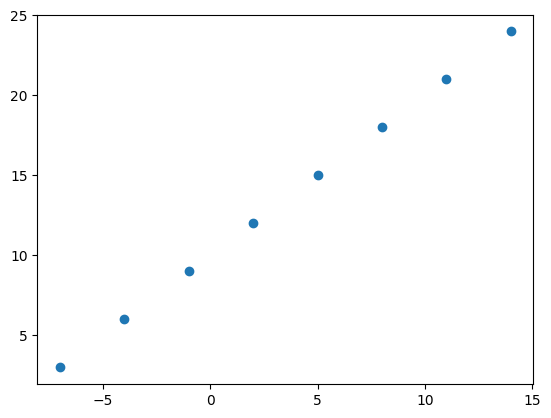

In [2]:
# Creating the data top view and fit
sess = tf.compat.v1.Session(config=config)
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Inputs and Output Shapes

In [4]:
#Demo
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

2024-02-12 09:59:31.929869: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-12 09:59:31.930064: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-12 09:59:31.930195: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[0].ndim

0

In [8]:
#Turn our Numpy arrays into Tensors

x = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

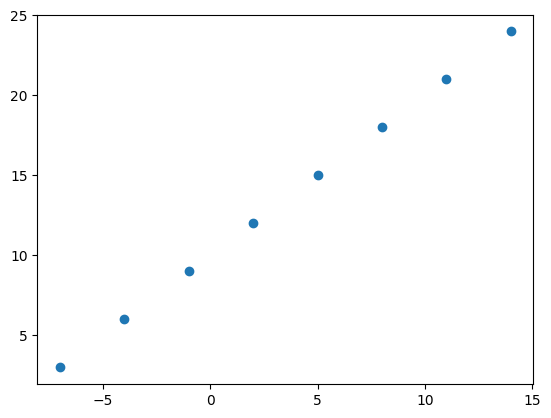

In [10]:
plt.scatter(x, y)

In [11]:
# Set seed
tf.random.set_seed(42)

#Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    # tf.keras.layers.Dense(1)
])

#mae - Mean Absolute Error
model.compile(loss = tf.keras.losses.mae, 
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=50)


Epoch 1/50
1/1 [==============================] - 0s 333ms/step - loss: 17.8923 - mae: 17.8923
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 17.6110 - mae: 17.6110
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 17.3298 - mae: 17.3298
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 17.0485 - mae: 17.0485
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 16.7673 - mae: 16.7673
Epoch 6/50
1/1 [==============================] - 0s 4ms/step - loss: 16.4860 - mae: 16.4860
Epoch 7/50
1/1 [==============================] - 0s 4ms/step - loss: 16.2048 - mae: 16.2048
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 15.9235 - mae: 15.9235
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 15.6423 - mae: 15.6423
Epoch 10/50
1/1 [==============================] - 0s 4ms/step - loss: 15.3610 - mae: 15.3610
Epoch 11/50
1/1 [==============================] - 0s 4ms/step - lo

2024-02-12 09:59:32.483447: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f3771506a70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-12 09:59:32.483474: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2024-02-12 09:59:32.490400: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
I0000 00:00:1707731972.516353     224 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 [==============================] - 0s 3ms/step - loss: 12.5719 - mae: 12.5719
Epoch 30/50
1/1 [==============================] - 0s 3ms/step - loss: 12.4394 - mae: 12.4394
Epoch 31/50
1/1 [==============================] - 0s 3ms/step - loss: 12.3069 - mae: 12.3069
Epoch 32/50
1/1 [==============================] - 0s 3ms/step - loss: 12.1744 - mae: 12.1744
Epoch 33/50
1/1 [==============================] - 0s 3ms/step - loss: 12.0419 - mae: 12.0419
Epoch 34/50
1/1 [==============================] - 0s 4ms/step - loss: 11.9094 - mae: 11.9094
Epoch 35/50
1/1 [==============================] - 0s 3ms/step - loss: 11.7769 - mae: 11.7769
Epoch 36/50
1/1 [==============================] - 0s 3ms/step - loss: 11.6444 - mae: 11.6444
Epoch 37/50
1/1 [==============================] - 0s 3ms/step - loss: 11.5119 - mae: 11.5119
Epoch 38/50
1/1 [==============================] - 0s 4ms/step - loss: 11.3794 - mae: 11.3794
Epoch 39/50
1/1 [==============================] - 0s 3ms/step - loss: 1

In [12]:
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 47ms/step


array([[16.8439]], dtype=float32)

In [14]:
y_pred = model.predict([14.0])
y_pred

1/1 [==============================] - 0s 21ms/step


array([[13.95483]], dtype=float32)

# Improving our Model

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 191ms/step - loss: 18.7322 - mae: 18.7322
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 18.4509 - mae: 18.4509
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 18.1697 - mae: 18.1697
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 17.8884 - mae: 17.8884
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 17.6072 - mae: 17.6072
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 17.3259 - mae: 17.3259
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 17.0447 - mae: 17.0447
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 16.7634 - mae: 16.7634
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 16.4822 - mae: 16.4822
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 16.2009 - mae: 16.2009
Epoch 11/100
1/1 [==============================] - 0s 3m

In [16]:
X

array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])

In [17]:
y


<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>

In [18]:
model.predict([17.0])

1/1 [==============================] - 0s 34ms/step


array([[29.724222]], dtype=float32)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    #tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 460ms/step - loss: 12.2335 - mae: 12.2335


2024-02-12 09:59:33.969200: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


Epoch 2/50
1/1 [==============================] - 0s 4ms/step - loss: 11.2323 - mae: 11.2323
Epoch 3/50
1/1 [==============================] - 0s 3ms/step - loss: 10.2141 - mae: 10.2141
Epoch 4/50
1/1 [==============================] - 0s 4ms/step - loss: 9.1707 - mae: 9.1707
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 8.0957 - mae: 8.0957
Epoch 6/50
1/1 [==============================] - 0s 4ms/step - loss: 6.9837 - mae: 6.9837
Epoch 7/50
1/1 [==============================] - 0s 4ms/step - loss: 7.0768 - mae: 7.0768
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 7.5042 - mae: 7.5042
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 7.9818 - mae: 7.9818
Epoch 10/50
1/1 [==============================] - 0s 5ms/step - loss: 8.0093 - mae: 8.0093
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 7.7362 - mae: 7.7362
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 7.2577 - mae:

In [20]:
model.predict([17.0])

1/1 [==============================] - 0s 37ms/step


array([[26.066736]], dtype=float32)

# Evaluating a model



In [21]:
#Bigger Data

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
# make labels
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [23]:
#visualize
import matplotlib.pyplot as plt


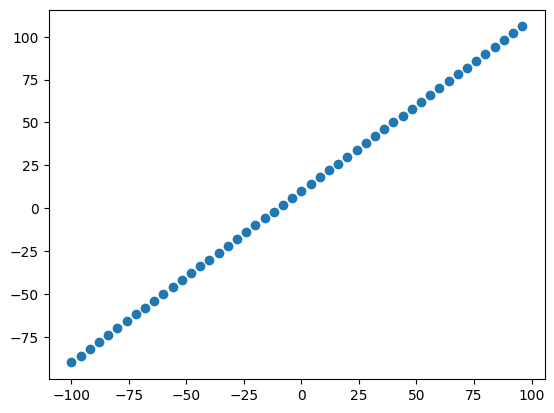

In [24]:
plt.scatter(X, y)

# 3 Sets

In [25]:
len(X)

50

In [26]:
# split the data into train and test data
X_train = X[:40] 
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_test)


(40, 10)

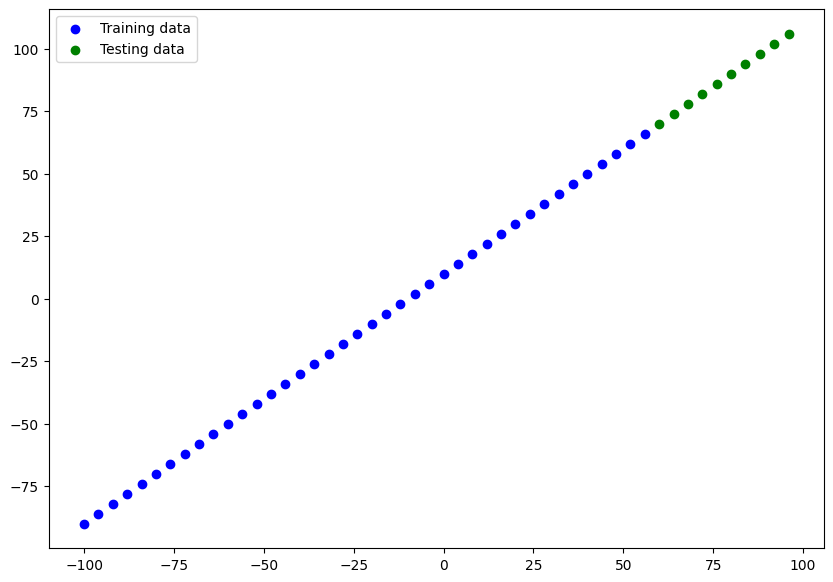

In [27]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 0s 4ms/step - loss: 30.6059 - mae: 30.6059
Epoch 2/50
2/2 [==============================] - 0s 3ms/step - loss: 9.8111 - mae: 9.8111
Epoch 3/50
2/2 [==============================] - 0s 3ms/step - loss: 10.7285 - mae: 10.7285
Epoch 4/50
2/2 [==============================] - 0s 3ms/step - loss: 9.5179 - mae: 9.5179
Epoch 5/50
2/2 [==============================] - 0s 3ms/step - loss: 10.4213 - mae: 10.4213
Epoch 6/50
2/2 [==============================] - 0s 3ms/step - loss: 9.6523 - mae: 9.6523
Epoch 7/50
2/2 [==============================] - 0s 3ms/step - loss: 8.7550 - mae: 8.7550
Epoch 8/50
2/2 [==============================] - 0s 2ms/step - loss: 9.0529 - mae: 9.0529
Epoch 9/50
2/2 [==============================] - 0s 3ms/step - loss: 19.2272 - mae: 19.2272
Epoch 10/50
2/2 [==============================] - 0s 3ms/step - loss: 10.3737 - mae: 10.3737
Epoch 11/50
2/2 [==============================] - 0s 3ms/step - loss: 8.4947 -

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
],name="TensorFlow_regression")

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

In [31]:
model.summary()

Model: "TensorFlow_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=50, verbose=1)

Epoch 1/50
2/2 [==============================] - 0s 5ms/step - loss: 48.3838 - mae: 48.3838
Epoch 2/50
2/2 [==============================] - 0s 3ms/step - loss: 34.9950 - mae: 34.9950
Epoch 3/50
2/2 [==============================] - 0s 3ms/step - loss: 38.9530 - mae: 38.9530
Epoch 4/50
2/2 [==============================] - 0s 3ms/step - loss: 27.7744 - mae: 27.7744
Epoch 5/50
2/2 [==============================] - 0s 3ms/step - loss: 15.1395 - mae: 15.1395
Epoch 6/50
2/2 [==============================] - 0s 3ms/step - loss: 12.0450 - mae: 12.0450
Epoch 7/50
2/2 [==============================] - 0s 4ms/step - loss: 11.3781 - mae: 11.3781
Epoch 8/50
2/2 [==============================] - 0s 3ms/step - loss: 11.2015 - mae: 11.2015
Epoch 9/50
2/2 [==============================] - 0s 3ms/step - loss: 41.5735 - mae: 41.5735
Epoch 10/50
2/2 [==============================] - 0s 3ms/step - loss: 28.8260 - mae: 28.8260
Epoch 11/50
2/2 [==============================] - 0s 3ms/step - loss

In [33]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Visualizing Model's prediction

In [34]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 28ms/step


array([[ 66.72912 ],
       [ 71.12167 ],
       [ 75.51424 ],
       [ 79.9068  ],
       [ 84.29936 ],
       [ 88.691925],
       [ 93.08449 ],
       [ 97.47705 ],
       [101.869606],
       [106.26216 ]], dtype=float32)

In [35]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [36]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                     test_labels=y_test,
                    predictions = y_pred,
                    ):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c="b", label="Training Data")
    plt.scatter(test_data, test_labels, c="g", label="Testing Data")
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend();

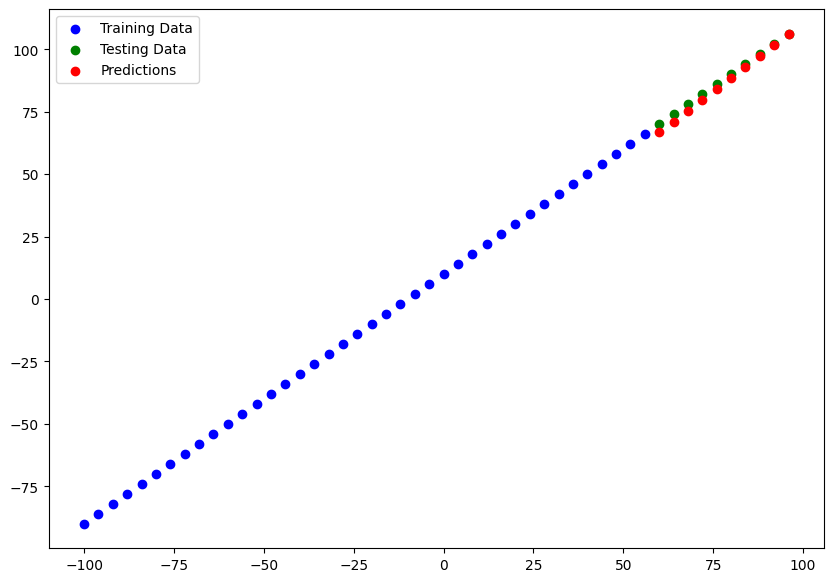

In [37]:
plot_predictions(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred,)

### Evaluating model's predictions with regression evaluation metrics

2 Main metrics:
    1) MAE - Mean Absolute Error, "On avg how wrong is each of my model's predictions"
    2) MSE - Mean Squared Error, "Square the average errors"

In [38]:
#Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 73ms/step - loss: 1.5568 - mae: 1.5568


[1.5567901134490967, 1.5567901134490967]

In [39]:
# Calc MAE

mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.5567901>

In [40]:
# calc MSE

mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse


<tf.Tensor: shape=(), dtype=float32, numpy=3.5344536>

In [41]:
#RESHAPE REQ
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 66.72912 ,  71.12167 ,  75.51424 ,  79.9068  ,  84.29936 ,
        88.691925,  93.08449 ,  97.47705 , 101.869606, 106.26216 ],
      dtype=float32)>

In [42]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [53]:
# Functions to reuse MAE and MSE

def mae(y_true, y_pred):
    mae = tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))
    return mae

def mse(y_true, y_pred):
    mse = tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))
    return mse

### Modelling expriments

1) 'model_1' - same 1 layer, trained with 100 epoch
2) 'model_2' - 2 layers, 100 epochs
3) 'model_3' - 3 layers, 40 epochs, Adam Optimizer (lr=0.1)

In [44]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [48]:
tf.random.set_seed(42)


model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])


model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 109.1945 - mae: 109.1945
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 73.7391 - mae: 73.7391
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 36.1858 - mae: 36.1858
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 7.5955 - mae: 7.5955
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 7.6123 - mae: 7.6123
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0250 - mae: 9.0250
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 9.4390 - mae: 9.4390
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.3052 - mae: 9.3052
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 12.0177 - mae: 12.0177
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 13.9887 - mae: 13.9887
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 26ms/step


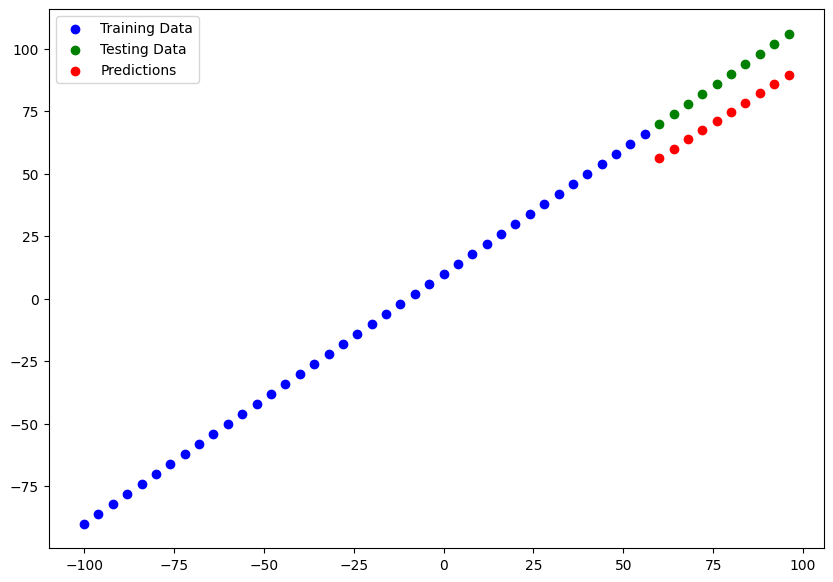

In [49]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [54]:
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=15.046153>,
 <tf.Tensor: shape=(), dtype=float32, numpy=227.24765>)

In [59]:
# Model 2

tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 31.7961 - mse: 1483.7692
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 21.3252 - mse: 580.4666
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 27.6318 - mse: 1107.8430
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 23.1187 - mse: 770.3525
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 13.8045 - mse: 231.5266
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0576 - mse: 135.4850
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 12.0343 - mse: 182.5763
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 10.8194 - mse: 132.2182
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 37.3448 - mse: 2146.1904
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 25.0368 - mse: 878.9881
Epoch 11/100
2/2 [============================

1/1 [==============================] - 0s 43ms/step


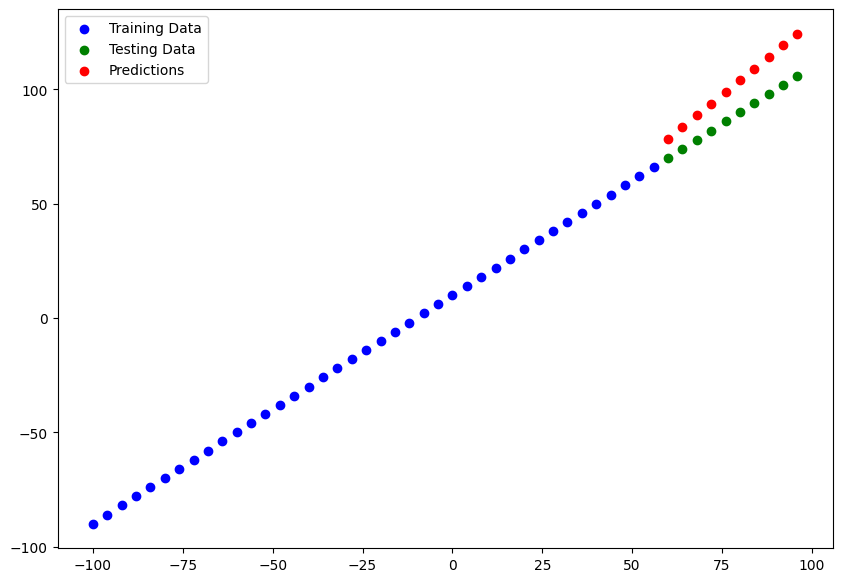

In [60]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [61]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.392023>,
 <tf.Tensor: shape=(), dtype=float32, numpy=189.4512>)

In [103]:
# Model 3

tf.random.set_seed(42)


model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics=["mse"]
               )

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=40)


Epoch 1/40
2/2 [==============================] - 1s 5ms/step - loss: 58.8408 - mse: 4883.1592
Epoch 2/40
2/2 [==============================] - 0s 4ms/step - loss: 15.2384 - mse: 386.9274
Epoch 3/40
2/2 [==============================] - 0s 4ms/step - loss: 26.5266 - mse: 975.0791
Epoch 4/40
2/2 [==============================] - 0s 4ms/step - loss: 8.0661 - mse: 69.8828
Epoch 5/40
2/2 [==============================] - 0s 4ms/step - loss: 9.6608 - mse: 105.3085
Epoch 6/40
2/2 [==============================] - 0s 4ms/step - loss: 8.3287 - mse: 91.7893
Epoch 7/40
2/2 [==============================] - 0s 4ms/step - loss: 6.5424 - mse: 52.3716
Epoch 8/40
2/2 [==============================] - 0s 4ms/step - loss: 6.1282 - mse: 51.6480
Epoch 9/40
2/2 [==============================] - 0s 3ms/step - loss: 7.7087 - mse: 82.3841
Epoch 10/40
2/2 [==============================] - 0s 3ms/step - loss: 13.2473 - mse: 248.2838
Epoch 11/40
2/2 [==============================] - 0s 3ms/step - loss

1/1 [==============================] - 0s 53ms/step


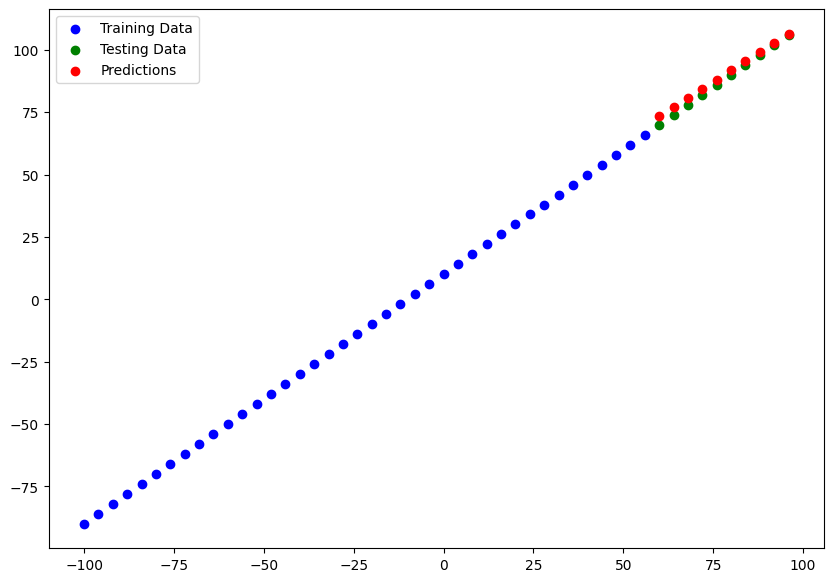

In [104]:
y_pred_3 = model_3.predict(y_test)
plot_predictions(predictions=y_pred_3)

In [105]:
y_pred_3, y_test

(array([[ 73.32782],
        [ 77.0082 ],
        [ 80.6886 ],
        [ 84.36898],
        [ 88.04937],
        [ 91.72976],
        [ 95.41014],
        [ 99.09053],
        [102.77092],
        [106.4513 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)